<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M1.204 · Intel·ligència Artificial Avançada / M0.539 · Intel·ligència Artificial</p>
<p style="margin: 0; text-align:right;">MU Enginyeria Informàtica / MU Enginyeria Computacional i Matemàtica</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## IMAGES CLASSIFICATION WITH CONVOLUTIONAL NEURAL NETWORKS


### Project description

The main purpose is to analyze the precission of a few CNN regarding a pre-defined dataset with pictures of dogs and cats.
This project creates simple CNNs and Xception neural network, and also it creates datagenerator together with plot functions.

#### Data used: https://www.robots.ox.ac.uk/~vgg/data/pets/

However, it has been modified as the original dataset contains some errors. It will be attached.
Note: For each file within the data set, if the name file starts with "C" the image represents a cat, if the name file starts with "D" the image represents a Dog.
Desafortunadament, aquest dataset conté varies errades i, a més, combina imatges amb distintes ressolucions, dificultant el seu ús. Per aquest motiu hem preparat una versió adaptada del dataset que us proporcionem a l'arxiu DATA.ZIP.

The version contains 4780 images in color (RGB) in JPG format with resolution of 128x128 píxels. These images will be used for the Neural Network so it can learn how to classify dogs and cats. The Data will be downloaded and set to the path and folder defined in 1-a. So, in order to replicate, please consider that some instructions will be different as I have mentioned.

### Exercices

**1-a) Dataset information**

In [1]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.
import os
from google.colab import drive
#1. Drive foulder is created together with the path to the images
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/IAA'
folder= '/DATA/'
path=ruta+folder
dir_list = os.listdir(path)

#2. A function to obtain two lists is created.
def divide_animal_type(lista):
  dogFiles=[]
  catFiles=[]
  for i in range(len(lista)):
    if lista[i][0:1]!='C':
      dogFiles.append(lista[i])
    else:
      catFiles.append(lista[i]) 
  return dogFiles, catFiles

dogFiles, catFiles = divide_animal_type(dir_list)
print("CATS: ",len(catFiles)," DOGS: ",len(dogFiles))

Mounted at /content/drive
CATS:  2395  DOGS:  2396


**1-b) Additional function to plot a predefined amount of images according to a path and the image description.**

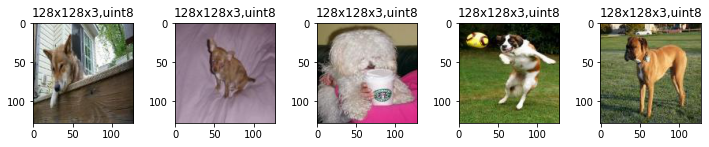

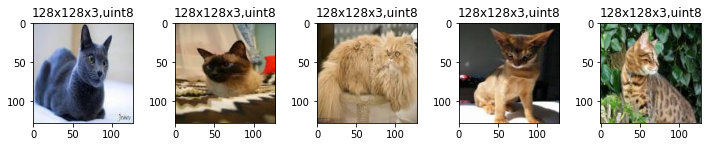

In [18]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.
import skimage
from skimage import io
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

def plot_pets(imgPath, fileNames, numImages):

  # 1- The layout of the images is created with a type of layout that allows the images to be separated
  #A ratio is sought with which each subplot looks good. This will be proportional to the number of images (numImages)
  fig, axarr = plt.subplots(1, numImages,figsize=(2*numImages,2*numImages))
  fig.tight_layout()

  for i in range(numImages):
    pathImage = ruta+imgPath+fileNames[i]
    imatge = skimage.io.imread(pathImage)
    #2- Image information
    nrows = imatge.shape[0]
    ncols = imatge.shape[1]
    chans = imatge.shape[2]
    typ = imatge.dtype
    #3- Title of the plot
    title=(str(nrows)+"x"+str(ncols)+"x"+str(chans)+","+str(typ))

    #4- Plot
    axarr[i].imshow(imatge)
    axarr[i].set_title(title)

#5- Plot of 5 pictures of each list:
plot_pets(folder,dogFiles,5)
plot_pets(folder,catFiles,5)

**1-c) Data augmentation based on boolean values, wether imagesa are requested for a flip, rotation and noise characteristics as in boolean values**

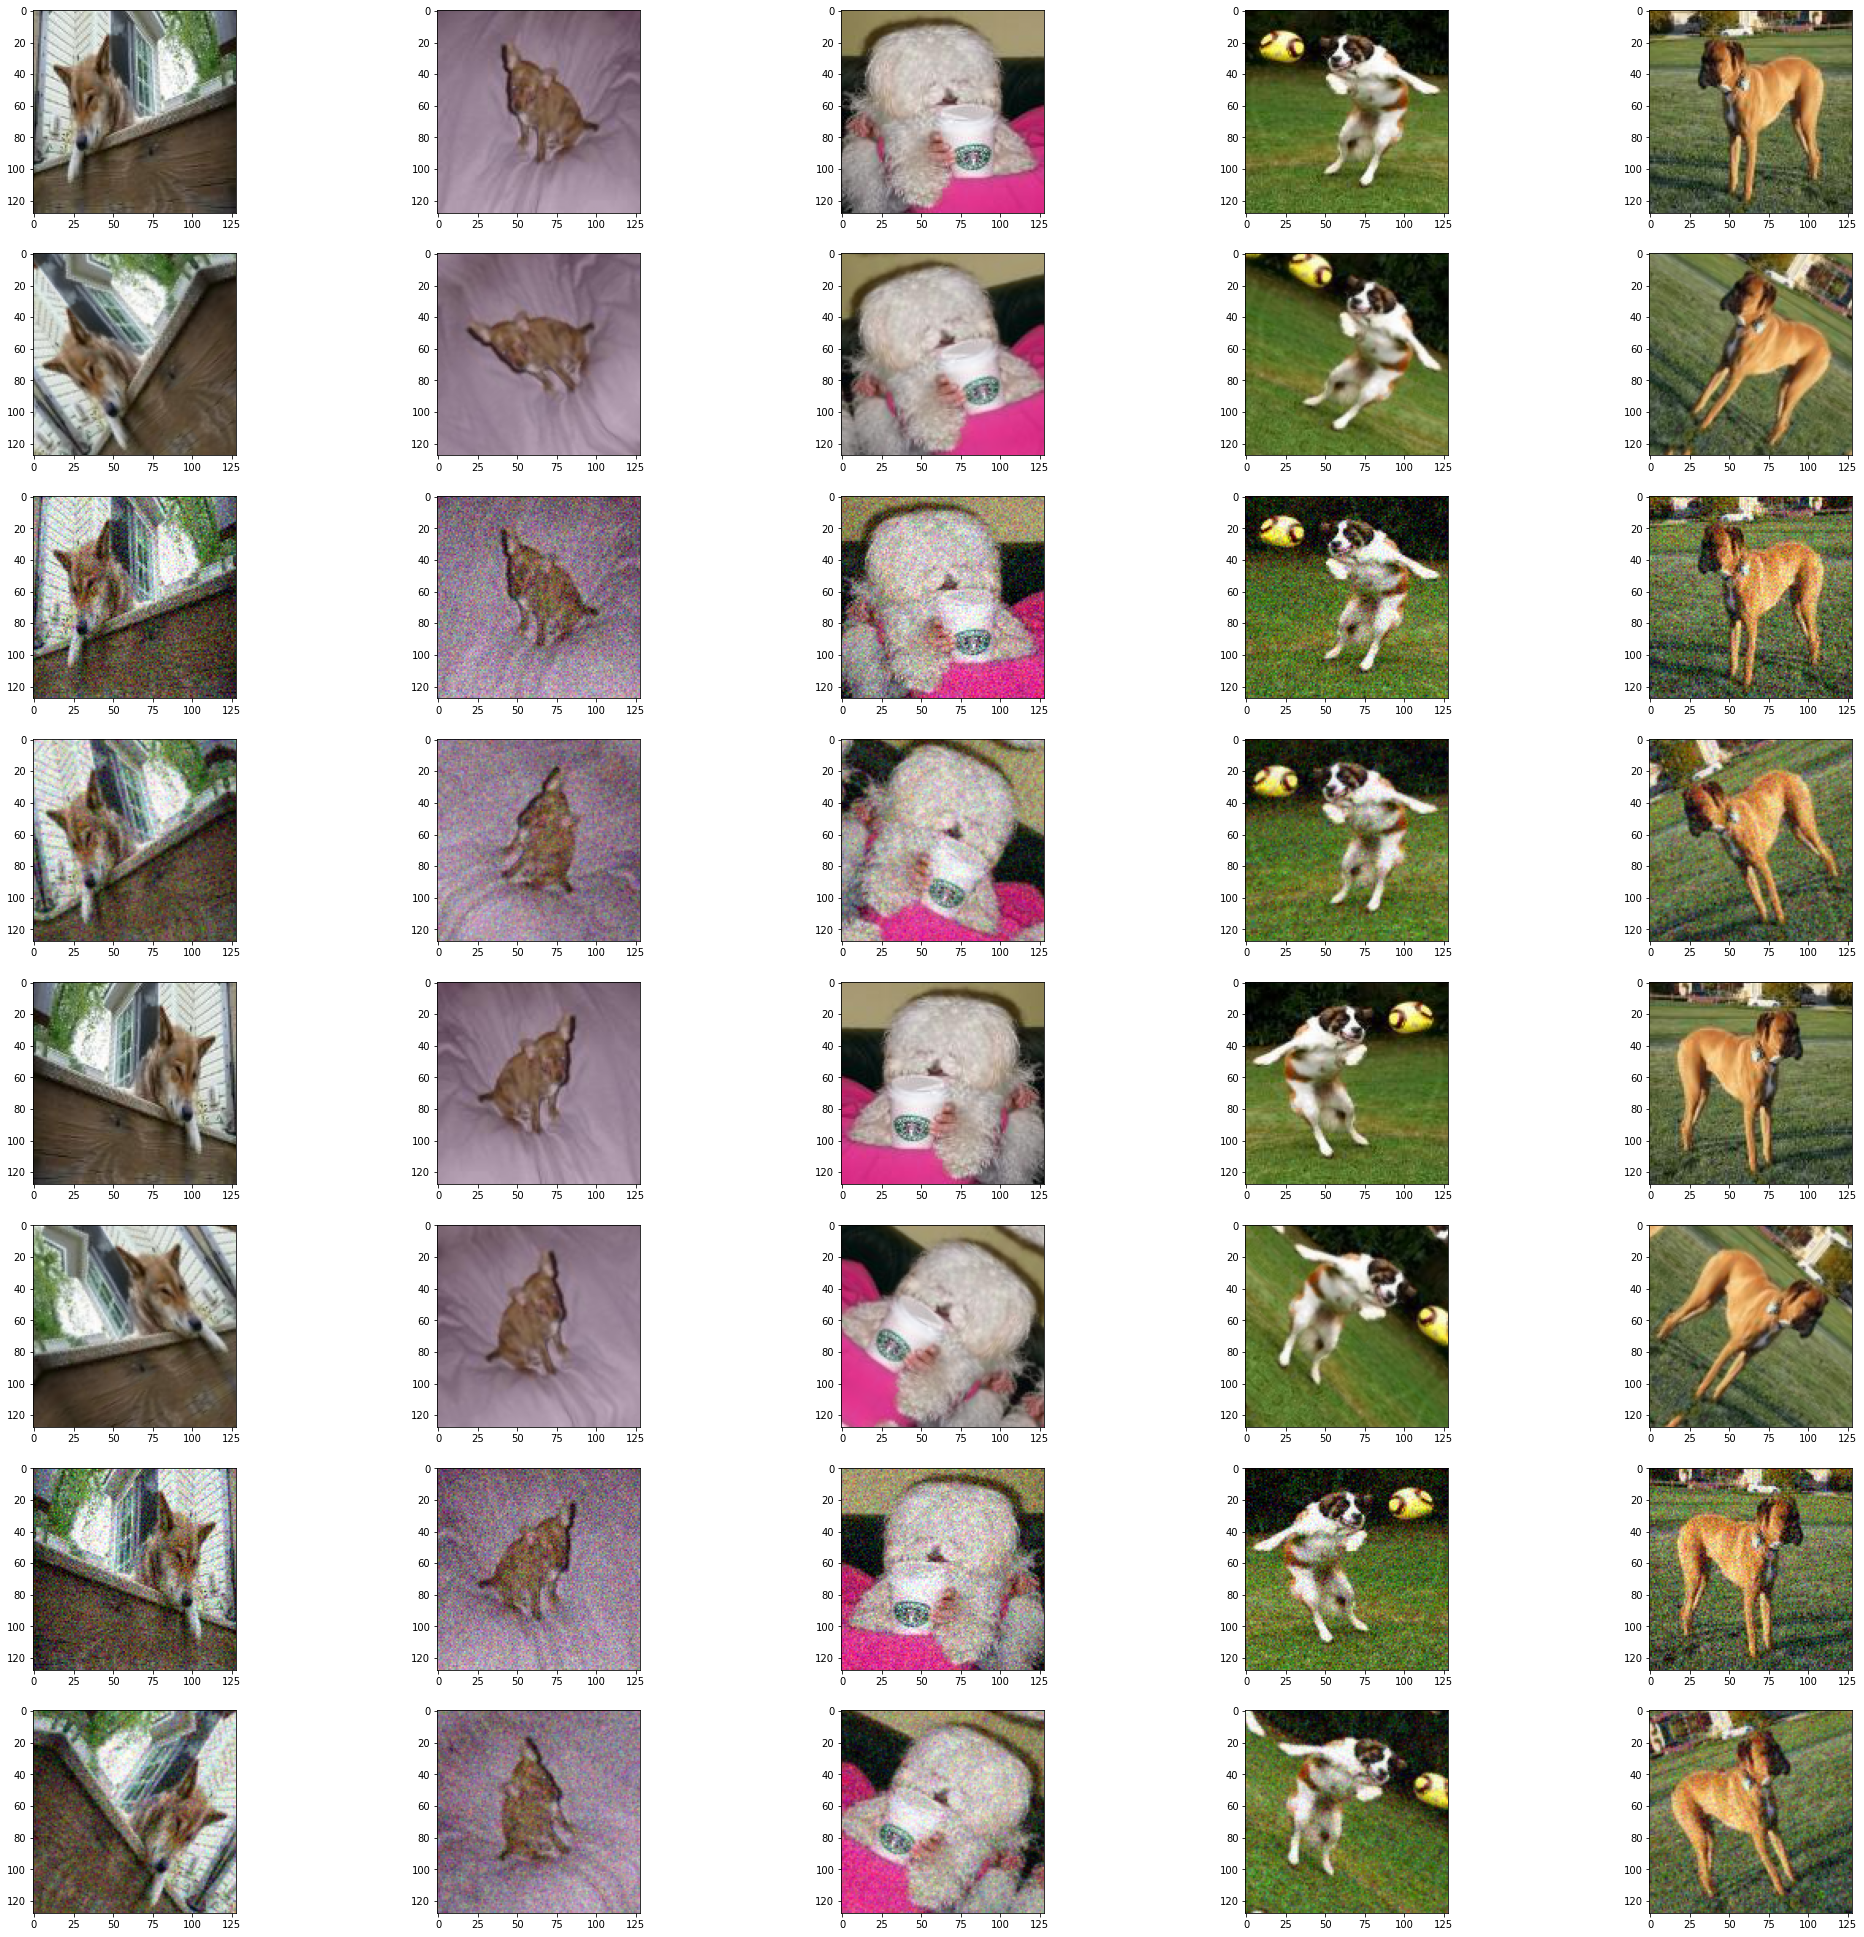

In [19]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.
import numpy as np
from skimage.transform import rotate
import random

#1- Data Augmentation function
def create_variation(theImage, doFlip, doNoise, doRotate):
  pathImage = path+theImage
  imagen = skimage.io.imread(pathImage)
  floatRepresentation = skimage.img_as_float(imagen)
  if doFlip:
    imagen = np.flip(floatRepresentation, axis=1)
  if doNoise:
    imagen = skimage.util.random_noise(imagen)
  if doRotate:
    imagen = skimage.transform.rotate(imagen, random.randrange(-45, 45), mode='symmetric')
  return skimage.img_as_float(imagen)

#2- For a better understanding of the function created, 40 images are plotted in a 8x5. Being 5 the quantity of unique pictures. Obviosuly, such quantity can be modified to enhance understanding
qty=5
fig, axarr = plt.subplots(8, qty, figsize=(7*qty,7*qty))

#3- Modification of data using the function and plot of such data.
for n in range(qty):
  t=0
  for i in range(2):
    for j in range(2):
      for z in range(2):
        imagen_modif = create_variation(dogFiles[n], i, j, z)
        axarr[t,n].imshow(imagen_modif)
        t=t+1

#Note: In this case images of dogs have been chosen. However, it could have been made of cats or even alternated between lists according to the number of n.

**1-d) Split of the Dataset according to the following percentages:**
* **trainSet: 70% of file nouns within dataset noms de fitxer existents al dataset.**
* **testSet: 20% of file nouns within dataset noms de fitxer existents al dataset.**
* **valSet: 10% of file nouns within dataset noms de fitxer existents al dataset.**

**Note: There are not repeated nouns between lists, and every time the function is used, the dataset will be shuffle before any distribution**

In [20]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.
from sklearn.model_selection import ShuffleSplit
from itertools import islice
from itertools import islice

def split_datafiles(dataset):
  #1- Shuffle to ensure variability
  random.shuffle(dataset)
  #2- List of length for the % of data sets
  len1=round(len(dataset)*0.7)
  len2=round(len(dataset)*0.2)
  len3=len(dataset)-(len1+len2)
  lens = [len1, len2, len3]
  #3- Iteration list
  iter_lst = iter(dataset)
  #4- As many lists as lens exists are created
  A=[list(islice(iter_lst, x)) for x in lens]
  #4.1- First list
  dogs, cats = divide_animal_type(A[0])
  C1 = len(dogs)
  D1 = len(cats)
  #4.2- Second list
  dogs, cats = divide_animal_type(A[1])
  C2 = len(dogs)
  D2 = len(cats)
  #4.3- Third list
  dogs, cats = divide_animal_type(A[2])
  C3 = len(dogs)
  D3= len(cats)
  #5- If the differences in the cat and dog lists do not meet the standards, then repeat the process
  while ((C1/D1>1.10 or C1/D1<0.9)or(C2/D2>1.10 or C2/D2<0.9)or(C3/D3>1.10 or C3/D3<0.9)):
    random.shuffle(dataset)
    lens = [len1, len2, len3]
    iter_lst = iter(dataset)
    A=[list(islice(iter_lst, x)) for x in lens]
    #First list
    dogs, cats = divide_animal_type(A[0])
    C1 = len(dogs)
    D1 = len(cats)
    #Second list
    dogs, cats = divide_animal_type(A[1])
    C2 = len(dogs)
    D2 = len(cats)
    #Third list
    dogs, cats = divide_animal_type(A[2])
    C3 = len(dogs)
    D3= len(cats)
  #6- Finally, the definitive lists of A are obtained.
  trainSet = A[0]
  testSet = A[1]
  valSet = A[2]
  return testSet, trainSet, valSet
testSet, trainSet, valSet = split_datafiles(dir_list)

#### **2- Data generation**

Keras offers different methods to provide data to the neural network during the training process, validation and test. It is known as data generators. However, it can be interesting to create our own data generator besides using and existing one. In this part of the project a Data Generator will be created and it will be used some data augmentation in it.

DataGenerator class inherits from Sequence and has at least the two following methods:

* \_\_len\_\_(): Return number of different batches that can be provided by the DataGenerator.
* \_\_getitem\_\_(i): Provides the images of the batch number "i" and their ground truth (whether it is a cat or a dog).

**2-a) A part from all the datagenerators that Keras has, it is also interesting to create our own DataGenerator.**
**Afterwards it will be used the following lines:**

**trainGenerator1=DataGenerator(trainSet,False)**
**trainGenerator2=DataGenerator(trainSet,True)**
**testGenerator=DataGenerator(testSet,False)**
**valGenerator=DataGenerator(valSet,False)**


In [ ]:
!pip install keras
!pip install tensorflow

In [21]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.
from tensorflow.keras.utils import Sequence
from skimage.io import imread
from skimage.util import img_as_float,random_noise
from skimage.transform import rotate
import numpy as np
import random
import os

class DataGenerator(Sequence):
    # Constructor. Input parameters are:
    # * fileNames   : List of sample file names, as provided by split_datafiles. This allows to build
    #                 a train data generator, a test data generator or a validation data generator just
    #                 by using the corresponding split_datafiles output.
    # * doRandomize : If True, the provided file names are shuffled after each training epoch. Also, each
    #                 individual image, when loaded, can be left unchanged, flipped, corrupted with
    #                 noise or rotated (as in previous activity). Each of the 8 possible combinations
    #                 (which included leaving the image unchanged) is chosen randomly with equal probability.
    #                 If False, file names are not shuffled and each image is provided unchanged.
    # * imgPath     : Path to the images (i.e. DATA)
    # * batchSize   : Number of sample images and ground truth items in each batch
    def __init__(self,fileNames,doRandomize=False,imgPath='DATA',batchSize=10):
        # Store parameters
        self.imgPath=imgPath
        self.fileNames=fileNames.copy()
        self.batchSize=batchSize
        self.doRandomize=doRandomize
        # Get number of files (to avoid computing them later)
        self.numImages=len(self.fileNames)
        # Shuffle them if required
        self.on_epoch_end()

    # Shuffle data at the end of every epoch if required
    def on_epoch_end(self):
        if self.doRandomize:
            random.shuffle(self.fileNames)

    # Returns the number ot batches
    def __len__(self):
        return int(np.ceil(float(self.numImages)/float(self.batchSize)))

    # Given an index, loads the image, performs data augmentation if doRandomize
    # is True by possibly modifying the image (see comments in the class header)
    # and outputs the (possibly transformed) image and its class. In all cases,
    # the returned image must be of "float" type (use img\_as\_float).
    # Input  : theIndex - Index of the image to load within self.fileNames.
    # Output : theImage - Loaded (and possibly transformed) image. Must be
    #                     of float type with values within [0,1]
    #          theClass - 0: Cat, 1: Dog
    def _load_image_(self,theIndex):
# ---> PUT YOUR CODE BETWEEN THIS LINE...
        if (self.fileNames[theIndex][0:1]!='C'):
          theClass = 1                          #Si la primera lletra no és C, aleshores és dog
        else:
          theClass = 0                          #Sino, és cat 
        if (self.doRandomize):                  
          theImage0 = create_variation(self.fileNames[theIndex], random.randint(0,1),  random.randint(0,1),  random.randint(0,1))
        else:
          theImage0 = skimage.io.imread(path+self.fileNames[theIndex])
        
        theImage = skimage.img_as_float(theImage0)
# ... AND THIS LINE <---
        return theImage,theClass

    # Provides the "theIndex-th" batch
    # Batch format:
    # - X : The data. Numpy array of shape (bs,nr,nc,3)
    # - y : The ground truth. Numpy array of shape (bs,1)
    # Where bs=batch size, nr=num rows, nc=num cols
    # Note that in our dataset all images have the same size and number of
    # channels. Otherwise, the __getitem__ method should also take care of
    # different resolutions and color encodings.
    def __getitem__(self,theIndex):
        X=[]
        y=[]
        bStart=max(theIndex*self.batchSize,0)
        bEnd=min((theIndex+1)*self.batchSize,self.numImages)
        for i in range(bStart,bEnd):
            [curImage,curGT]=self._load_image_(i)
            X.append(curImage)
            y.append(curGT)
        return np.array(X),np.array(y)

trainGenerator1=DataGenerator(trainSet,False)
trainGenerator2=DataGenerator(trainSet,True)
testGenerator=DataGenerator(testSet,False)
valGenerator=DataGenerator(valSet,False)

**2-b) A function to plot a batch within the data together with the groundtruth**


**[X,y]=trainGenerator1.__getitem__(0)**
**plot_batch(X,y)**
**[X,y]=trainGenerator2.__getitem__(0)**
**plot_batch(X,y)**

**Considering that trainGenerator2 does data augmentation, in every run the second plot will be modified.**

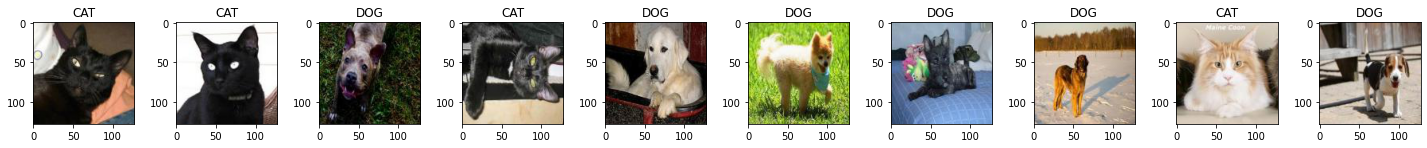

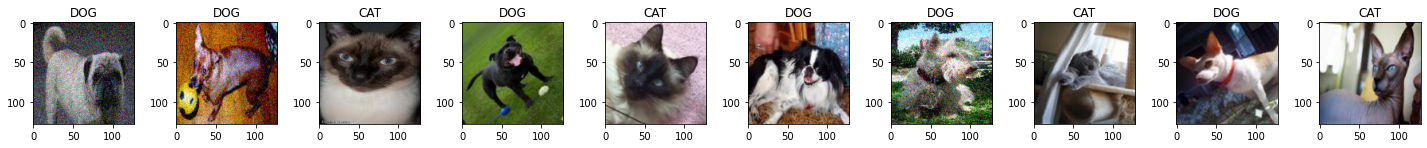

In [22]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

# ---> PUT YOUR CODE BETWEEN THIS LINE...        
def plot_batch(X,y):
  #1- Subplots are initialized taking into account the shape of X. It is understood that the batch size can vary and therefore the number of X elements as well.
  fig, axarr = plt.subplots(1, len(X),figsize=(2*len(X),2*len(X)))
  fig.tight_layout()
  for i in range(len(X)):
    #2- Title is defined according to the ground truth of the element
    if y[i]==1:
      title = "DOG"
    else:
      title = "CAT"
    #4- Plot
    axarr[i].set_title(title)
    axarr[i].imshow(X[i])
# ... AND THIS LINE <---
        
# Plot as example
[X1,y1]=trainGenerator1.__getitem__(0)
plot_batch(X1,y1)
[X2,y2]=trainGenerator2.__getitem__(0)
plot_batch(X2,y2)

#### **Creation of a ssimple classifier**

Considering the common neural network arquitecture:

* **feature extractor** which transforms the input image to a smaller representation using consecutive layers.
* **classificador** to transform the feature extractor output, it is necessary a *flattening* layerand a fully connected layers.


In [ ]:
!pip install tensorflow

In [23]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.
import tensorflow
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Dropout
from tensorflow.keras import optimizers

# Model creation and compilation is conveniently placed in a function so it is easy to
# re-create the model later.
def create_and_compile_scratch_model():
    theModel=models.Sequential([
        Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
        MaxPooling2D((2,2),padding='same'),
# ---> PUT YOUR CODE TO COMPLETE THE MODEL BETWEEN THIS LINE...        
        #1- Second pair of Conv2D and MaxPooling2D
        Conv2D(32,(3,3),activation='relu'),
        MaxPooling2D((2,2),padding='same'),
        #2- End of feature extractor and initialization of Flatten() layer
        Flatten(),
        #3- Classifier (2 dense layers denses with hidden layer of 128 neurons)
        Dense(128,activation='relu'),
# ... AND THIS LINE <---
        Dense(1,activation='sigmoid')])
    
# ---> PUT YOUR CODE TO COMPILE THE MODEL BETWEEN THIS LINE...        
    #4- Model is compiled
    theModel.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.0001), metrics = ['accuracy'])

# ... AND THIS LINE <---

    return theModel
theModel=create_and_compile_scratch_model()
theModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 30752)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

**3-b) Previous model is trained for 30 epochs using trainGenerator1 for data provision and valGenerator for validation data.**

In [24]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.
trainHistory = theModel.fit(x=trainGenerator1, validation_data=valGenerator, epochs = 30)

Epoch 1/30
336/336 [==============================] - 215s 634ms/step - loss: 0.6750 - accuracy: 0.5850 - val_loss: 0.6258 - val_accuracy: 0.6743
Epoch 2/30
336/336 [==============================] - 11s 33ms/step - loss: 0.6094 - accuracy: 0.6753 - val_loss: 0.5885 - val_accuracy: 0.7035
Epoch 3/30
336/336 [==============================] - 11s 33ms/step - loss: 0.5484 - accuracy: 0.7296 - val_loss: 0.5497 - val_accuracy: 0.7140
Epoch 4/30
336/336 [==============================] - 11s 33ms/step - loss: 0.5036 - accuracy: 0.7594 - val_loss: 0.5768 - val_accuracy: 0.6994
Epoch 5/30
336/336 [==============================] - 11s 33ms/step - loss: 0.4590 - accuracy: 0.7871 - val_loss: 0.5254 - val_accuracy: 0.7390
Epoch 6/30
336/336 [==============================] - 11s 33ms/step - loss: 0.4093 - accuracy: 0.8229 - val_loss: 0.5475 - val_accuracy: 0.7161
Epoch 7/30
336/336 [==============================] - 11s 33ms/step - loss: 0.3720 - accuracy: 0.8378 - val_loss: 0.6428 - val_accurac

**3-c) It will be created two functions:**

**-Function to save the model and its train information. save\_trained\_model(fileName,theModel,trainHistory)**

**-Function to load previvously saved model and train information [theModel,trainHistory]=load\_trained\_model(fileName).**

In [25]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.
from keras.models import load_model
import pickle
import json

pathModels = "/content/drive/MyDrive/IAA/"
def save_trained_model(fileName, theModel, trainHistory):
  #1- "theModel" is saved
  theModel.save(pathModels+fileName)
  #2- Pickle is used to save the trainHistory.history. However, it could have been used another methodology (e.g: .json o .csv)
  with open('/'+fileName, 'wb') as file_pi:
        pickle.dump( trainHistory, open( '/'+fileName, "wb" ) )
        #pickle.dump(trainHistory.history, file_pi)

def load_trained_model(fileName):
  theModel = load_model(pathModels+fileName)
  print("Model carregat correctament amb nom: "+fileName+".")
  
  theModel.summary()
  trainHistory = pickle.load( open( '/'+fileName, "rb" ) )
  print("Train history del model "+fileName+" carregat correctament.")
  return theModel, trainHistory

save_trained_model('FIRSTMODEL',theModel,trainHistory)
theModel, trainHistory = load_trained_model('FIRSTMODEL')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/IAA/FIRSTMODEL/assets
INFO:tensorflow:Assets written to: ram://82cbbb97-3496-462e-bd54-61a612e2a683/assets
Model carregat correctament amb nom: FIRSTMODEL.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                      

**3-d) Function to plot the training information of the model (theHistory). It will plot two graphics:**

**-Accuracy vs Epoch**

**-Loss vs Epoch**

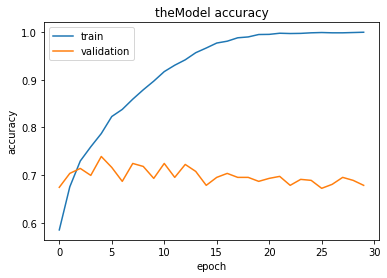

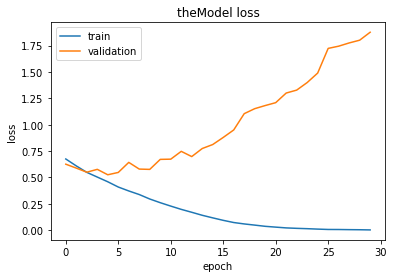

In [26]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

def plot_history(thehistory):
  #1- Plot of accuracy evolution of the "theModel" according to epochs
  plt.plot(thehistory.history['accuracy'])
  plt.plot(thehistory.history['val_accuracy'])
  plt.title('theModel accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  #1- Losses evolution of the model i plot
  plt.plot(thehistory.history['loss'])
  plt.plot(thehistory.history['val_loss'])
  plt.title('theModel loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

plot_history(trainHistory)
#Nota: For this section it has taken as reference the following resource:
#Site: machinelearningmastery.com, Date: 27/05, Available [Online], Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/ 

**3-e) Evaluation of the system using the testGeneratori, and printing of the accuarcy.**

In [27]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

#Evaluate the model to obtain 0,65 accuracy in last epoch
scores= theModel.evaluate(testGenerator)
print("Exactitud del model (theModel): %.2f%%" %(100*scores[1]))

96/96 [==============================] - 56s 593ms/step - loss: 1.9228 - accuracy: 0.6879
Exactitud del model (theModel): 68.79%


**3-f) Prediction using a batch of testGenerator, and then, plot of the images of the lot together with the predicted ground_truth**

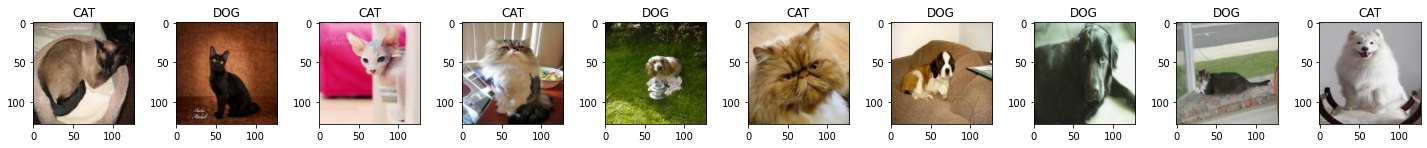

In [28]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

#1- Random number is initialized between 0 and maximum number of batches that testGenerator.
randomBatch = random.randint(0,testGenerator.__len__())
[X_predict,y_true]=testGenerator.__getitem__(randomBatch)

#2- Prediction using X_predict
y_predicted = theModel.predict(X_predict)
#3- Given that the output is decimal between 0 and 1, there are two options:
#3.1- Leave the decimal value
#3.2- Apply an additional filter to round out the values.

#4- It is chosen to round the values with round. Otherwise, all valars will be similar to 0 and therefore cats.
y_pred = np.round(y_predicted)

#5- Draw the batch images along with the class predicted by the model.
plot_batch(X_predict,y_pred)

**3-g) Summary regarding accuracy and lost from training and validation of the results within 3-d, 3-e i 3-f. Overfitting yes or no?**

As it can be seen, losses behave differently.
- In the training set, at the end of the training the losses are almost 0, this means that the model has been able to correctly reduce the losses at the same time as it obtains a high accuracy. In fact, the higher the accuracy the lower the value of the losses.
- In the other hand, in the case of the validation set, the losses could not be reduced, reaching a stagnation of the accuracy of the model around 0.7 (70%). And the fact that the losses have been gradually increasing, implies that the accuracy can not improve.

As for Overfitting, it does not occur at the beginning although it shows evidence that it does occur towards the end.
The clearest sign of overfitting comes from the high accuracy of the model with respect to the training set in the last 10 epochs. And it is towards the last 15 epochs that the precision of the validation set begins to stagnate.

Additionally, a simple test can be done to see what an exaggerated overfitting of the model is like:
If instead of supplying a dataGenerator (trainGenerator1) for the whole training set, you are supplied with a single batch of the dataGenerator (e.g .: [X, y] = trainGenerator1 .__ getitem __ (0)), it can be seen very quickly that in the third or fourth epoch an accuracy of 100% is already obtained.

This will result in the predictions being only the results of the training and not those of a current prediction.

Also, as it can be seen, the graphs separate in the early epochs, this is a sign to stop training as soon as the separation is evident.

Finally, it can be seen that in the predictions (3.f) the model behaves according to the accuracy that has been obtained. And therefore, it is true that in some cases it fails, but in most cases correct (given the arbitrariness of the model in its accuracy, in some cases 5-6 / 10 are correct and in others 7-8 / 10) .
In conclusion, although there are signs of overfitting, the model achieves an accuracy of 70%, which is not bad but can be improved.

#### **4: Improving the classifier**

The same process of the exercice 3 will be done, but considering the trainGenerator2 which has data augmentation in it, and therefore, it adds more variability to the data being used during the processes.

**4-a) New model is created but using trainGenerator2 and it is saved with "SECONDMODEL" name.**

In [30]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

#1- Model is restarted:
create_and_compile_scratch_model()

#2- Model is trained using trainGenerator2, valGenerator pand epochs=30. Also, the train history is saved to trainHistory variable
trainHistory = theModel.fit(x=trainGenerator2, validation_data=valGenerator, epochs = 30)

#3- Model is saved using SECONDMODEL as a filename.
save_trained_model('SECONDMODEL',theModel,trainHistory)


Epoch 1/30
336/336 [==============================] - 19s 57ms/step - loss: 0.5770 - accuracy: 0.7499 - val_loss: 0.6278 - val_accuracy: 0.6952
Epoch 2/30
336/336 [==============================] - 19s 57ms/step - loss: 0.5279 - accuracy: 0.7531 - val_loss: 0.6124 - val_accuracy: 0.6931
Epoch 3/30
336/336 [==============================] - 20s 59ms/step - loss: 0.5141 - accuracy: 0.7597 - val_loss: 0.5869 - val_accuracy: 0.7056
Epoch 4/30
336/336 [==============================] - 19s 58ms/step - loss: 0.4893 - accuracy: 0.7767 - val_loss: 0.6362 - val_accuracy: 0.7119
Epoch 5/30
336/336 [==============================] - 21s 62ms/step - loss: 0.4908 - accuracy: 0.7749 - val_loss: 0.5706 - val_accuracy: 0.7265
Epoch 6/30
336/336 [==============================] - 19s 57ms/step - loss: 0.4875 - accuracy: 0.7773 - val_loss: 0.5755 - val_accuracy: 0.7265
Epoch 7/30
336/336 [==============================] - 20s 60ms/step - loss: 0.4863 - accuracy: 0.7841 - val_loss: 0.5825 - val_accuracy:

**4-b) Training history is plotted and it testGenerator is used to evaluate the model. Finally the accuracy is printed.**

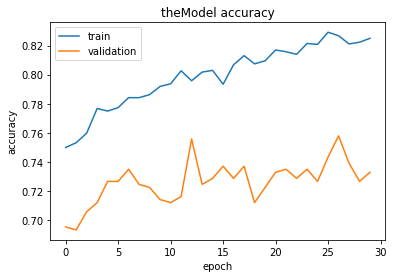

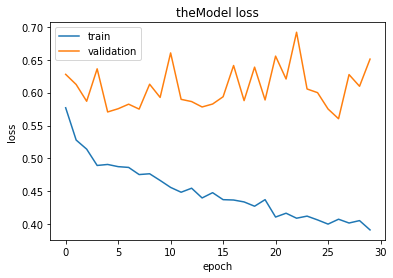

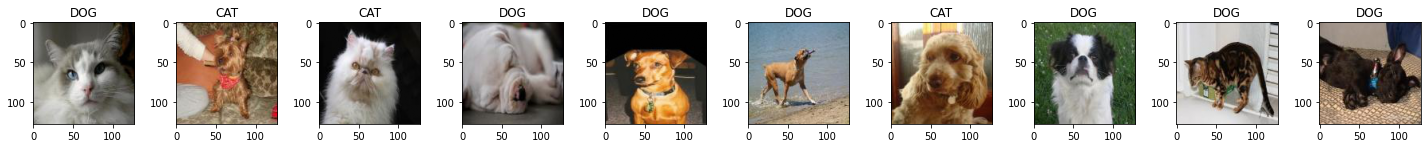

In [32]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

plot_history(trainHistory)

#1- Random number is initialized between 0 and maximum number of batches that testGenerator.
randomBatch = random.randint(0,testGenerator.__len__())
[X_predict,y_true]=testGenerator.__getitem__(randomBatch)

#2- Prediction using X_predict
y_predicted = theModel.predict(X_predict)
#3- Given that the output is decimal between 0 and 1, there are two options:
#3.1- Leave the decimal value
#3.2- Apply an additional filter to round out the values.

#4- It is chosen to round the values with round. Otherwise, all valars will be similar to 0 and therefore cats.
y_pred = np.round(y_predicted)

#5- The images of the batch are drawn together with the class predicted by the model.
plot_batch(X_predict,y_pred)

**4-c) Resultats regarding 4-b and the exercices done in 4-b are analyze. Overfitting? Why**

In this case the functions of the graphs behave similarly and progress progressively:
- When the losses decrease for the training set, it also decreases for the validation set, although with less pronunciation.
- When accuracy increases for the training set, so does the validation set.

Exercise 4:

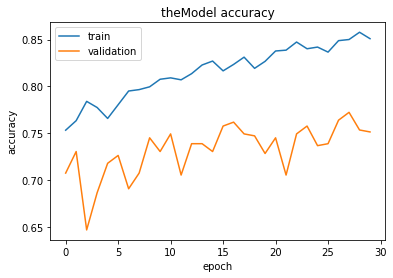

In this case, there are no signs of overfitting given the evolution of both accuracy and loss function. In the same way that the validation set behaves correctly. In both sets the functions have the same tendency with the same line slope (in case you want to draw a regression line) but with different cut-off points.

With respect to exercise 3, the following differences can be seen:
- Loss functions behave differently, in case of overfitting and in case there is none (as in the last case).
- The accuracy of the model increases progressively along with the accuracy of the validation set. While, in exercise 3, it reaches a limit of 0.7 after 10/15 epochs, a sign that no matter how much you train you will not get a better result.

Exercise 3:


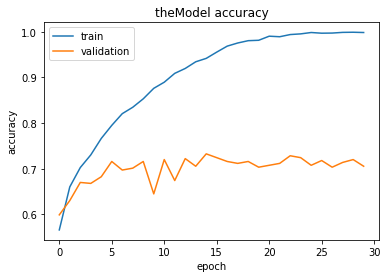

As conclusions of this section, beyond what has been explained, the following can be seen:
- Given the nature of trainGenerator2, it offers better results due to the data augmentation, which not only adds complexity for better training, but also offers more data.
- When the variability of the data (without data augmentation) is low, the model is likely not to progress as expected, resulting in a possible overfitting.
- Given the trend that has been mentioned, if the model is trained for more epochs it seems that a better result could be obtained. Although, depending on the loss function of the validation set, it appears that it is stabilizing and therefore the increase in accuracy is stabilizing as well.


Extraordinarily, I took the liberty to do a simulation with 60 epochs, and these are the results:

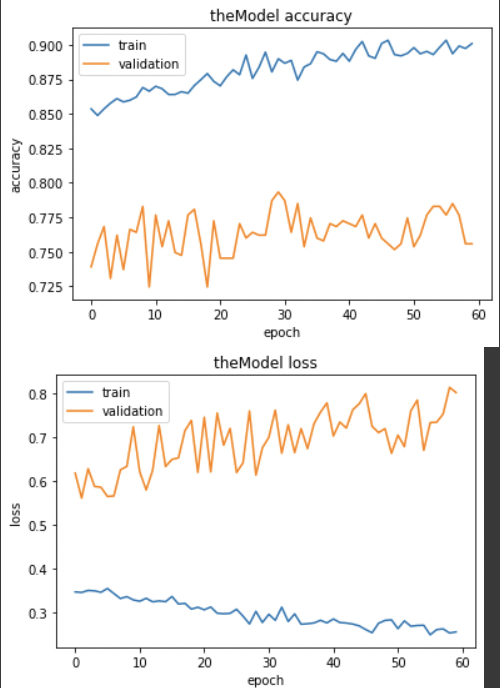

It can be seen that the overfitting symptoms end up protruding and that, therefore, the model will reach its maximum accuracy of 70/80 and will stabilize.

Note: Possible discrepancies with the images are due to the fact that the multiple cells were saved.

#### **5: Transfer learning and Xception**

**5-b) Xception instance is created with input shape (128,128,3), pre-trained with Imagenet. The purpose is to not instantiate the classifier (only the feature extractor). Then make this instance * NOT * trainable.**

In [33]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT. 
import tensorflow as tf
from tensorflow import keras

#1- Initialization of Xception
xception_model = tf.keras.applications.Xception(
    include_top=False,
    #1.1 Pre-training with ImageNet
    weights="imagenet",
    input_tensor=None,
    input_shape=(128,128,3),
    pooling=None,
    #1.2- Only 1 class with values (with vlues 1: Dog, 0 Cat)
    classes=1,
    classifier_activation="softmax",
)
#2- Not Trainable:
xception_model.trainable = False

**5-c) Considering the previous sections, the classifier will have the same structure as previous sections. Also the losses function, metrics and optimizer will be the same. However, the Xception model will have a pretty similar structure. In this case, the Xception model will be used as a feature extractor.**

In [36]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.
import tensorflow
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Dropout
from tensorflow.keras import optimizers

def create_and_compile_Xception_model():
    theModel=models.Sequential([

# ---> PUT YOUR CODE TO COMPLETE THE MODEL BETWEEN THIS LINE...        
        xception_model,
        #2- Feature extractor ends with the latter line and Flatten() is initialized
        Flatten(),
        #3- Classifier (2 dense layer, with hidden layer with 128 neurones)
        Dense(128,activation='relu'),
# ... AND THIS LINE <---
        Dense(1,activation='sigmoid')])

# ---> PUT YOUR CODE TO COMPLETE THE MODEL BETWEEN THIS LINE...        
    #4- Model is compiled
    theModel.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.0001), metrics = ['accuracy'])
# ... AND THIS LINE <---
    return theModel

theModel=create_and_compile_Xception_model()
theModel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 flatten_7 (Flatten)         (None, 32768)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               4194432   
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 25,056,041
Trainable params: 4,194,561
Non-trainable params: 20,861,480
_________________________________________________________________


**5-d) The previous model is trained during 30 epochs using trainGenerator2 as data provider and valGenerator for validation data. Also, it is saved using the XCEPTIONMODEL as a fileName.**

In [37]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

#1- Model is trained for 30 epochs using trainGenerator2 and valGenerator.
trainHistory = theModel.fit(x=trainGenerator2, validation_data=valGenerator, epochs = 30)

#2- The model is saved using XCEPTIONMODEL as filename.
save_trained_model("XCEPTIONMODEL",theModel,trainHistory)

Epoch 1/30
336/336 [==============================] - 25s 66ms/step - loss: 0.3870 - accuracy: 0.8488 - val_loss: 0.1614 - val_accuracy: 0.9332
Epoch 2/30
336/336 [==============================] - 21s 63ms/step - loss: 0.2775 - accuracy: 0.8942 - val_loss: 0.1107 - val_accuracy: 0.9457
Epoch 3/30
336/336 [==============================] - 21s 64ms/step - loss: 0.2662 - accuracy: 0.9025 - val_loss: 0.1208 - val_accuracy: 0.9582
Epoch 4/30
336/336 [==============================] - 21s 62ms/step - loss: 0.2357 - accuracy: 0.9120 - val_loss: 0.1395 - val_accuracy: 0.9353
Epoch 5/30
336/336 [==============================] - 21s 62ms/step - loss: 0.2317 - accuracy: 0.9114 - val_loss: 0.1142 - val_accuracy: 0.9457
Epoch 6/30
336/336 [==============================] - 21s 62ms/step - loss: 0.2273 - accuracy: 0.9132 - val_loss: 0.1715 - val_accuracy: 0.9332
Epoch 7/30
336/336 [==============================] - 21s 63ms/step - loss: 0.2213 - accuracy: 0.9195 - val_loss: 0.1695 - val_accuracy:

**5-e) Using previosuly defined functions:**

* **Draw training histories.**
* **Evaluate the model with testGenerator and print the resulting accuracy**
* **Predict a batch of the testGenerator and draw the images it contains along with the predicted class (CAT or DOG).**

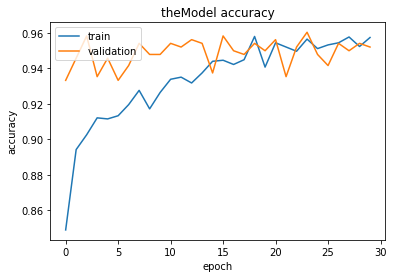

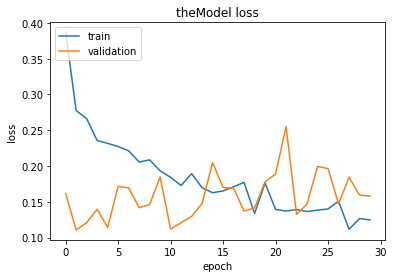

96/96 [==============================] - 3s 34ms/step - loss: 0.1817 - accuracy: 0.9520
Exactitud del model (theModel): 95.20%


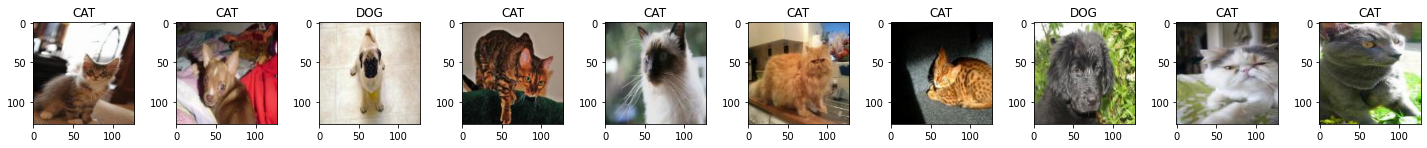

In [38]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

#1- Train history is plotted:
plot_history(trainHistory)

#2- The model is evaluated with testGenerator and the accuracy is printed:
scores= theModel.evaluate(testGenerator)
print("Exactitud del model (theModel): %.2f%%" %(100*scores[1]))

#3- Prediction
#3.1- Random number is initialized between 0 and maximum number of batches that testGenerator.
randomBatch = random.randint(0,testGenerator.__len__())
[X_predict,y_true]=testGenerator.__getitem__(randomBatch)

#3.2- Prediction accoridng X_predict
y_predicted = theModel.predict(X_predict)

#3.3- Round values, otherwise all values will be similar to 0.
y_pred = np.round(y_predicted)

#3.5- Plot
plot_batch(X_predict,y_pred)